In [1]:
%load_ext autoreload
%autoreload 2

In [59]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

from keypoint_matching import KeypointMatcher
from RANSAC import ImageAlignment, project_2d_to_6d, project_6d_to_2d
from utils import show_two_images, show_single_image

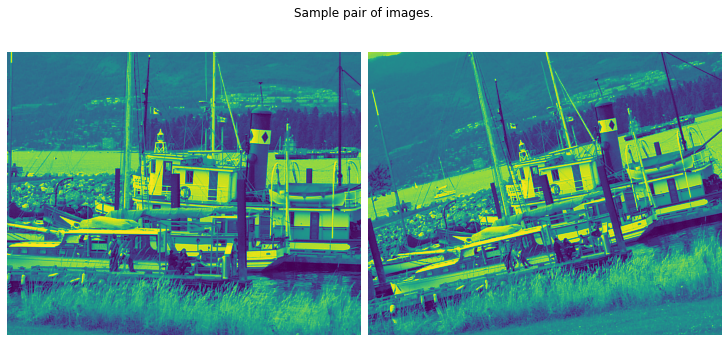

In [3]:
boat1 = cv2.imread('boat1.pgm', cv2.IMREAD_GRAYSCALE)
boat2 = cv2.imread('boat2.pgm', cv2.IMREAD_GRAYSCALE)
show_two_images(boat1, boat2, title="Sample pair of images.")

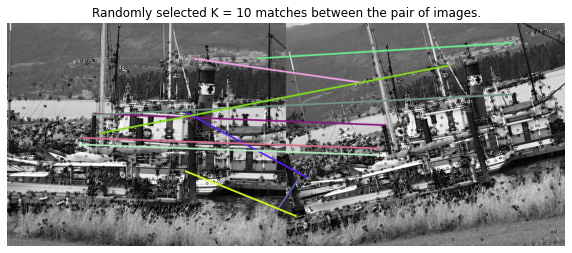

In [4]:
# get matches
kp_matcher = KeypointMatcher(contrastThreshold=0.1, edgeThreshold=5)
matches, kp1, des1, kp2, des2 = kp_matcher.match(boat1, boat2, show_matches=True)

Found 21 inliers!
Found 71 inliers!
Found 165 inliers!
Found 169 inliers!
Found 509 inliers!
Found 1332 inliers!


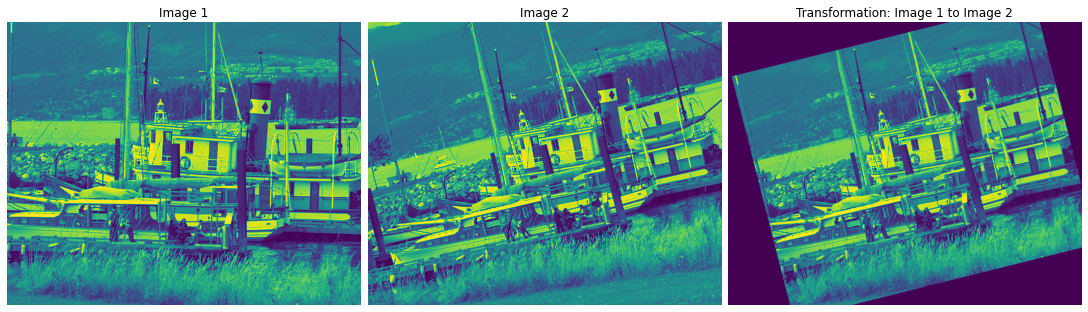

In [5]:
image_alignment = ImageAlignment()
params = image_alignment.align(boat1, kp1, boat2, kp2, matches)

In [6]:
params

array([  0.85457689,   0.21903282,  -0.21331004,   0.85834052,
         9.19746377, 130.61504566])

In [11]:
x2, y2

(543.7144775390625, 266.2601623535156)

In [21]:
A = project_2d_to_6d(np.array([[x1, y1]]))
x = params

b = np.dot(A, x)

In [22]:
b

array([542.54751332, 265.30430629])

In [61]:
colors = cm.rainbow(np.linspace(0, 1, 10))

In [62]:
colors[0]

array([0.5, 0. , 1. , 1. ])

In [63]:
def show_transformed_points(img1, img2, X1, kp1, kp2, matches, num_to_show=100):

    H1, W1 = img1.shape
    H2, W2 = img2.shape
    img = np.hstack([img1, img2])

    random_matches = np.random.choice(matches, num_to_show)

    fig, ax = plt.subplots(1, 1, figsize=(18, 7))
    colors = cm.rainbow(np.linspace(0, 1, num_to_show))

    for i, match in enumerate(random_matches):

        # select a single match to visualize
        x1, y1 = kp1[match.queryIdx].pt
        x2, y2 = kp2[match.trainIdx].pt

        # get (x1, y1) transformed to (x1_transformed, y1_transformed)
        A = project_2d_to_6d(np.array([[x1, y1]]))
        (x1_transformed, y1_transformed) = np.dot(A, params)

        ax.imshow(img, cmap="gray")
        ax.axis("off")
        ax.scatter(x1_transformed + W1, y1_transformed, s=200, marker="x", color=colors[i])
        ax.plot((x1, x1_transformed + W1), (y1, y1_transformed), linestyle="--", color=colors[i], marker="o")

    plt.show()

In [49]:
show_transformed_points(boat1, boat2, X1, kp1, kp2, matches, num_to_show=100)

NameError: name 'X1' is not defined

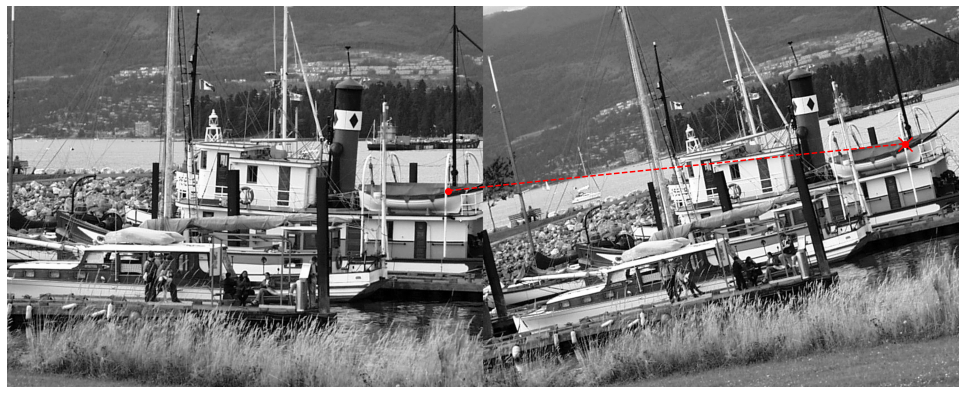

In [58]:
# select a single match to visualize
sel_match = matches[10]
x1, y1 = kp1[sel_match.queryIdx].pt
x2, y2 = kp2[sel_match.trainIdx].pt

# get (x1, y1) transformed to (x1_transformed, y1_transformed)
A = project_2d_to_6d(np.array([[x1, y1]]))
(x1_transformed, y1_transformed) = np.dot(A, params)

H1, W1 = boat1.shape
H2, W2 = boat1.shape

fig, ax = plt.subplots(1, 1, figsize=(18, 7))

img = np.hstack([boat1, boat2])
ax.imshow(img, cmap="gray")
ax.axis("off")
# ax.scatter(x1, y1, s=100, color="red", facecolor="none", linewidths=2.0)
# ax.scatter(x2 + W1, y2, s=100, color="red", facecolor="none", linewidths=2.0)
ax.scatter(x1_transformed + W1, y1_transformed, s=200, marker="x", color="red")
ax.plot((x1, x1_transformed + W1), (y1, y1_transformed), linestyle="--", color="red", marker="o")

plt.show()

In [106]:
X.size

1000.0

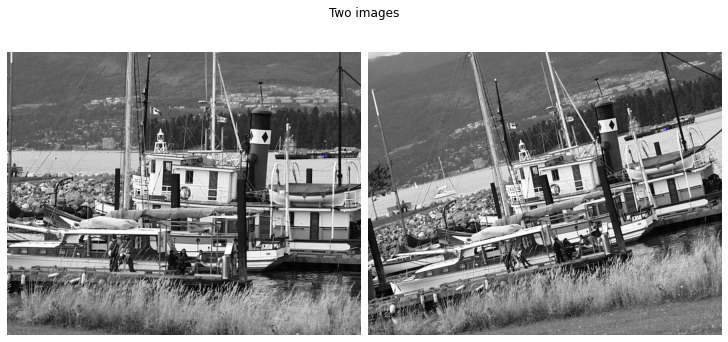

In [94]:
sel_match = matches[100]

sel_kp1 = [kp1[sel_match.queryIdx]]
sel_kp1[0].size = 10
sel_kp2 = [kp2[sel_match.trainIdx]]

show_two_images(
    cv2.drawKeypoints(boat1, sel_kp1, color=(0, 0, 255), outImage=None),
    cv2.drawKeypoints(boat2, sel_kp2, color=(0, 0, 255), outImage=None),
)

In [69]:
sel_kp2

[<KeyPoint 0x13f9927e0>]

In [6]:
boat1.shape

(680, 850)

In [29]:
cv2.KeyPoint?

Init signature: cv2.KeyPoint(self, /, *args, **kwargs)
Docstring:      <no docstring>
File:           ~/miniforge3/envs/cv1labs/lib/python3.9/site-packages/cv2/cv2.cpython-39-darwin.so
Type:           type
Subclasses:     


In [58]:
key_points = [cv2.KeyPoint(100, 250, size=10)]

In [59]:
img = cv2.drawKeypoints(boat1, key_points, outImage=None, color=(0, 0, 255))

In [60]:
cv2.drawKeypoints?

Docstring:
drawKeypoints(image, keypoints, outImage[, color[, flags]]) -> outImage
.   @brief Draws keypoints.
.   
.   @param image Source image.
.   @param keypoints Keypoints from the source image.
.   @param outImage Output image. Its content depends on the flags value defining what is drawn in the
.   output image. See possible flags bit values below.
.   @param color Color of keypoints.
.   @param flags Flags setting drawing features. Possible flags bit values are defined by
.   DrawMatchesFlags. See details above in drawMatches .
.   
.   @note
.   For Python API, flags are modified as cv.DRAW_MATCHES_FLAGS_DEFAULT,
.   cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, cv.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG,
.   cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS
Type:      builtin_function_or_method


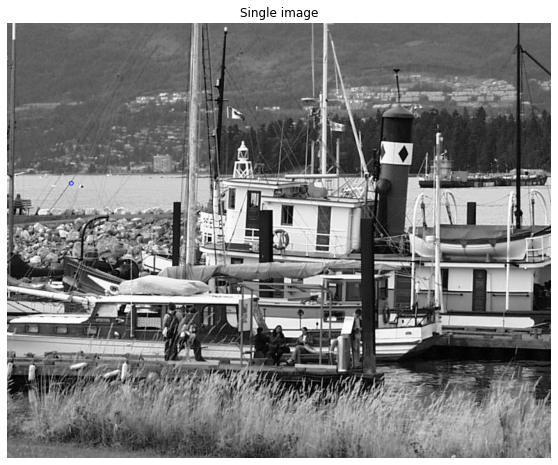

In [61]:
show_single_image(img, figsize=(10, 8))

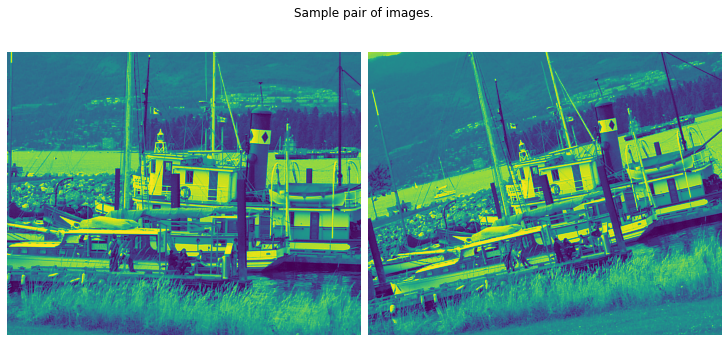

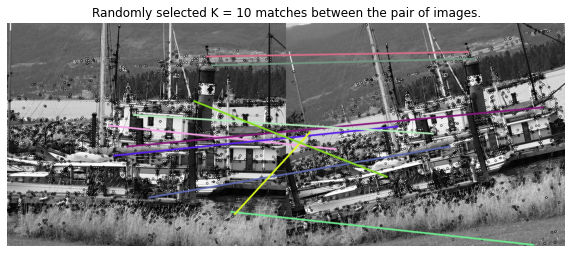

Found 15 inliers!
Found 18 inliers!
Found 243 inliers!
Found 355 inliers!
Found 904 inliers!
Found 1333 inliers!


In [3]:

# get matches
kp_matcher = KeypointMatcher(contrastThreshold=0.1, edgeThreshold=5)
matches, kp1, des1, kp2, des2 = kp_matcher.match(boat1, boat2, show_matches=True)

image_alignment = ImageAlignment()
params = image_alignment.align(boat1, kp1, boat2, kp2, matches)